# 0.6 Modele rozwoju epidemii

Wybrany kraj: **Nigeria** dla przedziału czasu 03.04.22-02.07.22

Model logistyczny **Verhulsta**.



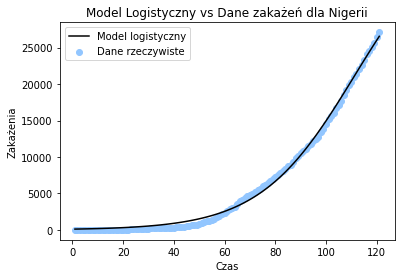

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import math
import scipy.optimize as optim
warnings.filterwarnings('ignore')

# import 
data = pd.read_csv('/content/sample_data/Nigeria.csv', usecols=['total_cases'])
data = data.reset_index(drop=False)
data.columns = ['Timestep', 'Total Cases']

# funkcje logistyczne
def my_logistic(t, a, b, c):
  return c / (1 + a * np.exp(-b*t))
def my_logistic2(t):
  return c / (1 + a * np.exp(-b*t))

# losowa inicjalizacja parametrów a, b i c
p0 = np.random.exponential(size=3)

#ustawienie górnych i dolnych ograniczeć dla a, b i c
bounds = (0, [100000., 3., 1000000000.])

# dopasowanie krzywej
x = np.array(data['Timestep']) + 1
y = np.array(data['Total Cases'])
(a,b,c),cov = optim.curve_fit(my_logistic, x, y, bounds=bounds, p0=p0)

# wykres
plt.scatter(x, y)
plt.plot(x, my_logistic2(x), color="black")
plt.title('Model Logistyczny vs Dane zakażeń dla Nigerii')
plt.legend(['Model logistyczny', 'Dane rzeczywiste'])
plt.xlabel('Czas')
plt.ylabel('Zakażenia')
plt.style.use('seaborn-pastel')
